# **Portfolio Management Strategies**


### **1.**

Given the following monthly returns, evaluate how well the passive portfolio tracked the S&P 500 benchmark. 

Compute:  
- (i) R²  
- (ii) α  
- (iii) β  
- (iv) average return differential (with sign)  
- (v) average absolute return differential.

| Month     | Portfolio Return | S&P 500 Return |
|-----------|------------------|----------------|
| January   | 5.0%             | 5.2%          |
| February  | -2.3%            | -3.0%         |
| March     | -1.8%            | -1.6%         |
| April     | 2.2%             | 1.9%          |
| May       | 0.4%             | 0.1%          |
| June      | -0.8%            | -0.5%         |
| July      | 0.0%             | 0.2%          |
| August    | 1.5%             | 1.6%          |
| September | -0.3%            | -0.1%         |
| October   | -3.7%            | -4.0%         |
| November  | 2.4%             | 2.0%          |
| December  | 0.3%             | 0.2%          |


(i) From simple linear regression of portfolio return $R_p$ on benchmark return $R_b$ :

$$
R_p=\alpha+\beta R_b+\varepsilon
$$


The $R^2$ is:

$$
R^2=\left(\operatorname{Corr}\left(R_p, R_b\right)\right)^2
$$

(ii) $\alpha$

Regression alpha (in monthly return units):

$$
\alpha=\bar{R}_p-\beta \bar{R}_b
$$

(iii) $\beta$

Beta from sample covariance and variance:

$$
\beta=\frac{\operatorname{Cov}\left(R_p, R_b\right)}{\operatorname{Var}\left(R_b\right)}
$$

(iv) Average return differential

Portfolio minus benchmark:

$$
\operatorname{AvgDiff}=\frac{1}{N} \sum_{t=1}^N\left(R_{p, t}-R_{b, t}\right)
$$

(v) Average absolute return differential

$$
\operatorname{Avg} \operatorname{AbsDiff}=\frac{1}{N} \sum_{t=1}^N\left|R_{p, t}-R_{b, t}\right|
$$


In [1]:
import numpy as np

portfolio_pct = np.array([5.0, -2.3, -1.8, 2.2, 0.4, -0.8,
                          0.0, 1.5, -0.3, -3.7, 2.4, 0.3])
sp500_pct    = np.array([5.2, -3.0, -1.6, 1.9, 0.1, -0.5,
                         0.2, 1.6, -0.1, -4.0, 2.0, 0.2])

portfolio = portfolio_pct / 100 # % to decimal
sp500 = sp500_pct / 100

x = sp500
y = portfolio

# beta = Cov(x,y) / Var(x)
beta = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)

# alpha = mean(y) - beta * mean(x)
alpha = np.mean(y) - beta * np.mean(x)

# (ii) R^2 = (correlation between x and y)^2
corr = np.corrcoef(x, y)[0, 1]
R2 = corr ** 2

# (iii)
diff = y - x
avg_diff = np.mean(diff)

# (iv) 
avg_abs_diff = np.mean(np.abs(diff))

In [2]:
print(f"R^2: {R2:.2f}")
print(f"Alpha (per month): {alpha * 100:.2f}%")
print(f"Beta: {beta:.4f}")
print(f"Average return differential: {avg_diff * 100:.2f}%")
print(f"Average absolute return differential: {avg_abs_diff * 100:.2f}%")

R^2: 0.98
Alpha (per month): 0.08%
Beta: 0.9571
Average return differential: 0.07%
Average absolute return differential: 0.28%


### **2.**

Consider the annual returns produced by two different active equity portfolio managers (A and B) as well as those to the stock index with which they are both compared:

| Period | Manager A | Manager B | Index |
|--------|-----------|-----------|--------|
| 1 | 12.8% | 13.9% | 11.8% |
| 2 | -2.1% | -4.2% | -2.2% |
| 3 | 15.6% | 13.5% | 18.9% |
| 4 | 0.8% | 2.9% | -0.5% |
| 5 | -7.9% | -5.9% | -3.9% |
| 6 | 23.2% | 26.3% | 21.7% |
| 7 | -10.4% | -11.2% | -13.2% |
| 8 | 5.6% | 5.5% | 5.3% |
| 9 | 2.3% | 4.2% | 2.4% |
| 10 | 19.0% | 18.8% | 19.7% |

- **(a)** Determine whether either manager outperformed the index based on the average annual return differential relative to the benchmark. <br>
Show your computations.

- **(b)** Compute the tracking error for each manager relative to the index (standard deviation of the return differential). <br>
State which manager better limited unsystematic risk exposure and explain briefly.


In [3]:
manager_a_pct = np.array([12.8, -2.1, 15.6, 0.8, -7.9, 23.2, -10.4, 5.6, 2.3, 19.0])
manager_b_pct = np.array([13.9, -4.2, 13.5, 2.9, -5.9, 26.3, -11.2, 5.5, 4.2, 18.8])
index_pct     = np.array([11.8, -2.2, 18.9, -0.5, -3.9, 21.7, -13.2, 5.3, 2.4, 19.7])

a = manager_a_pct / 100
b = manager_b_pct / 100
idx = index_pct / 100

# (a) Average annual return diff (manager - index)
diff_a = a - idx
diff_b = b - idx

avg_diff_a = np.mean(diff_a)
avg_diff_b = np.mean(diff_b)

print("Average annual return differential (Manager A - Index): "
      f"{avg_diff_a * 100:.2f}%")
print("Average annual return differential (Manager B - Index): "
      f"{avg_diff_b * 100:.2f}%")

# (b) Tracking error
te_a = np.std(diff_a)
te_b = np.std(diff_b)

print("Tracking error Manager A (std of diff): "
      f"{te_a * 100:.2f}%")
print("Tracking error Manager B (std of diff): "
      f"{te_b * 100:.2f}%")

Average annual return differential (Manager A - Index): -0.11%
Average annual return differential (Manager B - Index): 0.38%
Tracking error Manager A (std of diff): 2.00%
Tracking error Manager B (std of diff): 2.84%


### **3.**
Each month for the past several years, you have collected the monthly returns to an index of large-cap value stocks and an index of large-cap growth stocks. For the last two years, for both indexes you have converted these monthly returns into a series of rolling average annualized returns by taking an average of the previous 12 monthly returns and multiplying that average by 12. The resulting rolling average annualized returns (24 months) are given below.

| Month | Value Index Ann. Ret. (%) | Growth Index Ann. Ret. (%) |
|-------|----------------------------|------------------------------|
| 1  | 8.97%  | 9.50%  |
| 2  | 17.38% | 17.48% |
| 3  | 28.11% | 26.81% |
| 4  | 16.19% | 12.92% |
| 5  | 16.66% | 14.60% |
| 6  | 16.72% | 14.90% |
| 7  | 19.43% | 13.21% |
| 8  | 16.88% | 9.68%  |
| 9  | 17.88% | 10.14% |
| 10 | 20.41% | 12.42% |
| 11 | 28.86% | 20.69% |
| 12 | 23.02% | 16.09% |
| 13 | 27.38% | 20.05% |
| 14 | 21.43% | 15.65% |
| 15 | 20.76% | 18.25% |
| 16 | 25.62% | 25.59% |
| 17 | 28.46% | 26.74% |
| 18 | 28.92% | 29.62% |
| 19 | 18.87% | 22.49% |
| 20 | 21.75% | 26.38% |
| 21 | 20.18% | 21.63% |
| 22 | 19.62% | 19.51% |
| 23 | 18.48% | 20.76% |
| 24 | 21.97% | 24.59% |

- a. For both the value and growth indexes, calculate the arithmetic mean of the 24 monthly average annualized returns. <br>
Which index appears to have outperformed over this period? Explain.

- b. For each month, compute the differential $D_t = R_{\text{value}, t} - R_{\text{growth}, t}$. <br>
Calculate $\bar{D}$ and compare it to your answer from part (a).

- c. Plot the return differential series $\{D_t\}_{t=1}^{24}$ on a graph (akin to Panel A of Exhibit 11.20), <br>
with months on the x-axis and $D_t$ (in percentage points, annualized) on the y-axis.

- d. Interpret $\bar{D}$ from part (b) as a value factor risk premium. <br>
Explain how it represents the average annualized return to a zero-cost strategy that is long value and short growth.

- e. Compute the percentage of months in which the growth index's rolling average annualized return exceeds that of the value index. <br>
Discuss what this implies about the reliability and time-variation of the value risk premium.


In [4]:
value_pct = np.array([
    8.97, 17.38, 28.11, 16.19, 16.66, 16.72,
    19.43, 16.88, 17.88, 20.41, 28.86, 23.02,
    27.38, 21.43, 20.76, 25.62, 28.46, 28.92,
    18.87, 21.75, 20.18, 19.62, 18.48, 21.97
])

growth_pct = np.array([
    9.50, 17.48, 26.81, 12.92, 14.60, 14.90,
    13.21, 9.68, 10.14, 12.42, 20.69, 16.09,
    20.05, 15.65, 18.25, 25.59, 26.74, 29.62,
    22.49, 26.38, 21.63, 19.51, 20.76, 24.59
])

months = np.arange(1, 25)

# (a) 
mean_value = np.mean(value_pct)
mean_growth = np.mean(growth_pct)

print(f"(a) Mean annualized return (Value index):  {mean_value:.2f}%")
print(f" Mean annualized return (Growth index): {mean_growth:.2f}%")

(a) Mean annualized return (Value index):  21.00%
 Mean annualized return (Growth index): 18.74%


In [5]:
# (b) 

D = value_pct - growth_pct  # in percentage points
D_bar = np.mean(D)

print("\n(b) Average differential D̄ (Value - Growth): "
      f"{D_bar:.2f} % ")



(b) Average differential D̄ (Value - Growth): 2.26 % 


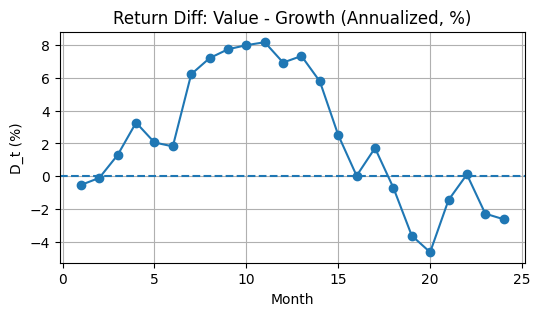

In [6]:
# (c) 

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(months, D, marker='o')
plt.axhline(0, linestyle='--')  # zero line
plt.title("Return Diff: Value - Growth (Annualized, %)")
plt.xlabel("Month")
plt.ylabel("D_t (%)")
plt.grid(True)
plt.show()

In [7]:
# (e) 

growth_beats_value = growth_pct > value_pct
num_months_growth_beats = np.sum(growth_beats_value)
total_months = len(value_pct)

percent_months_growth_beats = 100 * num_months_growth_beats / total_months

print("(e) Number of months Growth > Value: "
      f"{num_months_growth_beats} out of {total_months}")
print(f"    Percentage of months Growth > Value: "
      f"{percent_months_growth_beats:.2f}%")

(e) Number of months Growth > Value: 8 out of 24
    Percentage of months Growth > Value: 33.33%
